Rose Finn

FYRF

## Goal ##
The goal of this project is to look for filaments around nearby clusters.  I chose to study XX cluster...

**Virgo Cluster**

RA = 12h30m47.3s 

DEC = +12d20m13s GClstr   


recession velocity = 1079 km/s

redshift = 0.003600

** Data **

* We are using data from the NASA-Sloan Atlas.  
* We downloaded the data file from here: http://www.nsatlas.org/data

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from astropy.io import fits

//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
# these are the coordinates for my cluster
ra = 187.69708  
dec = 12.33694

In [3]:
# Read in the NASA-Sloan Atlas
nsafile='/Users/rfinn/research/NSA/nsa_v0_1_2.fits'
#nsafile = 'nsa_v0_1_2.fits'
nsa=fits.getdata(nsafile)

In [4]:
# select galaxies near my cluster
raflag = np.abs(nsa.RA -ra) < 20. 
decflag= np.abs(nsa.DEC -dec) < 20.
velflag = (nsa.ZDIST*3.e5 > 2000.) & (nsa.ZDIST*3.e5 < 3000.)
vflag = raflag & decflag & velflag

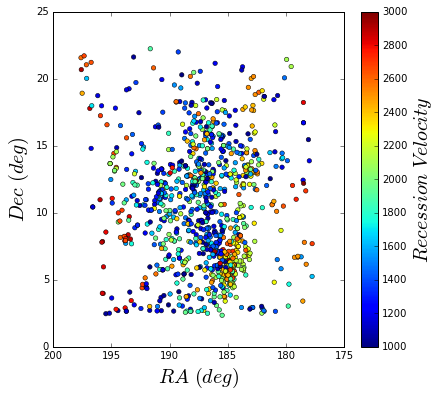

In [8]:
fig=plt.figure(figsize=(6,6))
plt.scatter(nsa.RA[vflag],nsa.DEC[vflag],c=nsa.ZDIST[vflag]*3.e5,s=20,vmin=1000,vmax=3000,lw=0.5)
#plt.axis([150,220,-10,50])
plt.gca().invert_xaxis()

cb=plt.colorbar(fraction=.08)
cb.set_label('$Recession \ Velocity$',size=20)
plt.xlabel('$RA  \ (deg)$',fontsize=20)
plt.ylabel('$Dec \ (deg)$',fontsize=20)
#plt.title('NASA-Sloan Atlas Galaxies in the Vicinity of Virgo')
plt.savefig('mycluster_positions.png')

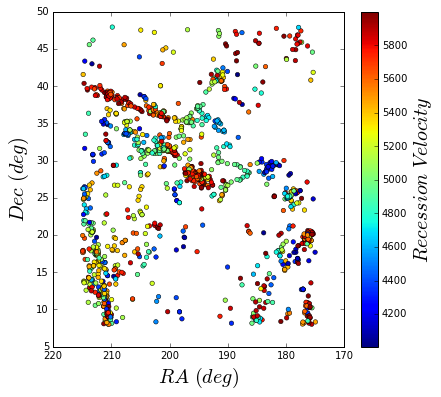

In [9]:
# Coma

ra = 194.9531
dec = 27.9807

# select galaxies near my cluster
raflag = np.abs(nsa.RA -ra) < 20. 
decflag= np.abs(nsa.DEC -dec) < 20.
velflag = (nsa.ZDIST*3.e5 > 4000.) & (nsa.ZDIST*3.e5 < 6000.)
vflag = raflag & decflag & velflag

fig=plt.figure(figsize=(6,6))
plt.scatter(nsa.RA[vflag],nsa.DEC[vflag],c=nsa.ZDIST[vflag]*3.e5,s=20,lw=0.5)
#plt.axis([150,220,-10,50])
plt.gca().invert_xaxis()

cb=plt.colorbar(fraction=.08)
cb.set_label('$Recession \ Velocity$',size=20)
plt.xlabel('$RA  \ (deg)$',fontsize=20)
plt.ylabel('$Dec \ (deg)$',fontsize=20)
#plt.title('NASA-Sloan Atlas Galaxies in the Vicinity of Virgo')
plt.savefig('Coma_positions.png')

## Estimate the Size of a Filamentary Structure ##

Procedure:
* Measure the size in degrees
    * use distanct formula sqrt((RA2-RA1)^2 + (DEC2-DEC1)^2)
* Use Hubble's Law to estimate distance to cluster
* Use arclength formula to estimate physical size of filament


In [14]:
# recession velocity of cluster
vr = 5000. # km/s
# convert to distance using Hubble's Law
# Vr = H0 x distance
# H0 = 70 km/s/Mpc
H0 = 70.
distance_Mpc = vr/H0
# define the extent of the filament
RA1 = 200.
DEC1 = 36.
RA2 = 215.
DEC2 = 40.
# calculate length of filament in degrees
length_deg = np.sqrt((RA2-RA1)**2 + (DEC2-DEC1)**2)
# convert from degrees to radians
length_rad = length_deg*(np.pi/180.)
# convert length to Mpc
length_Mpc = distance_Mpc * length_rad
# convert length from Mpc to light years
length_Mly = length_Mpc*3.26
print 'length of filament in millions of light years = %.1f'%(length_Mly)

length of filament in millions of light years = 63.1


## Summary ##



